# Diet and Cost Minimization Calculator
>    This calculator will minimize the cost given a set of food [variables] and constraints on those variables.  

## Setup

In [507]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import pulp
from IPython.display import display, HTML

## Table of Available Foods:

In [508]:
groceries = pd.read_csv('groceries.csv')
display(groceries,)

,Items,Carbohydrates,Protein,Fat,Calories,Serving,Cost,Cat,Description
0,Apple,15,0,0.0,63,1 apple,0.220,Integer,Great Value Apple
1,Beer,7,1,0.0,110,12oz,0.733,Integer,Budlight 30 Pack
2,Bread,14,3,1.0,70,1 slice,0.060,Integer,Great Value Wheat Bread
3,Broccoli,4,1,0.0,25,3oz=1cup,0.270,Integer,Great Value Frozen Broccoli
4,Brown_Rice,140,16,6.0,640,180g=1cup,0.270,Continuous,Great Value Brown Rice
5,Cheese,1,7,9.0,111,1oz,0.270,Integer,Great Value Mild Shredded Cheddar
6,Chicken,0,19,8.0,150,4oz,0.770,Integer,Costco Chicken Thighs
7,Coconut_Oil,0,0,14.0,120,1tbsp,0.100,Integer,Costco Coconut Oil
8,Coke,0,0,0.0,0,12oz,0.360,Integer,Coke Zero
9,Corn,11,2,1.0,60,4oz=1/2cup,0.360,Integer,Great Value Corn


                    https://www.tablesgenerator.com/html_tables#
            https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html

>   We are going to use the above table, nutrition values, cost and Python to minimize cost given our constraints

In [509]:

items=groceries['Items'].values
carbs=groceries.set_index('Items').drop(['Protein','Fat','Calories','Serving','Cost','Cat','Description'],axis=1).to_dict()
protein=groceries.set_index('Items').drop(['Carbohydrates','Fat','Calories','Serving','Cost','Cat','Description'],axis=1).to_dict()
fat=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Serving','Cost','Cat','Description'],axis=1).to_dict()
cal=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Serving','Cost','Cat','Description'],axis=1).to_dict()
serv=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Calories','Cost','Cat','Description'],axis=1).to_dict()
cost=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Serving','Fat','Cat','Description'],axis=1).to_dict()
category=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Serving','Fat','Description','Cost'],axis=1).to_dict()
description=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Serving','Fat','Cat','Cost'],axis=1).to_dict()

# Create the 'diet' variable to contain the problem data
diet = pulp.LpProblem("Minimize Cost", pulp.LpMinimize)

# A dictionary called 'item_vars' is created to contain the referenced Variables
item_vars= pulp.LpVariable.dict('Items',items,lowBound=0,cat='Integer')
for i in category['Cat']:
    item_vars[i].cat=category['Cat'][i]

# The objective function is added to 'diet' first
diet += pulp.lpSum([cost['Cost'][i]*item_vars[i] for i in items]), "Cost"


## Primary Variables

### Omar

In [510]:

Calories=2000
eps=Calories*.05
Goal_Weight=170

diet += item_vars['Bread'] <= 4 
diet += item_vars['Bread'] >= 4 
#diet += item_vars['Whey'] <= 4 
diet += item_vars['Eggs'] <= 8
diet += item_vars['Brown_Rice'] >= 0.25
#diet += item_vars['Brown_Rice'] <= 0
#diet += item_vars['Cheese'] >= 1 
diet += item_vars['Beer'] >= 2  
diet += item_vars['Beer'] <= 2 
#diet += item_vars['Ground_Beef'] >= 1  
diet += item_vars['Pasta_Sauce'] <= 0  
diet += item_vars['Corn'] <= 0  
diet += item_vars['Apple'] <= 0 
diet += item_vars['Broccoli'] <= 0 
diet += item_vars['Coconut_Oil'] <= 0
diet += item_vars['Chicken'] <= 0 
diet += item_vars['Green_Beans'] <= 0 
diet += item_vars['Elbow_Pasta'] <= 0 
diet += item_vars['Oats'] <= 0 
diet += item_vars['Orange'] <= 0 
diet += item_vars['Greek_Yogurt'] <= 0
diet += item_vars['Mayonnaise'] <= 0
diet += item_vars['Tuna'] <= 0
diet += item_vars['Sausage'] >= 1
#diet += item_vars['Protein_Bar'] >= 1


### Dee

In [511]:

#Calories=1500
#eps=Calories*.05*0
#Goal_Weight=130*0.8

#diet += item_vars['Refried_Beans'] <= 2,   "highBeans"
#diet += item_vars['Refried_Beans'] >= 1,   "lowBeans"
#diet += item_vars['Eggs'] <= 5,            "highEggs"
#diet += item_vars['Whey'] <= 2,             "highWhey"
#diet += item_vars['Beer'] >= 3,             "lowBeer"
#diet += item_vars['Half_and_Half'] >= 1,    "lowHalf"
#diet += item_vars['Bread'] <= 4,            "highBread"
#diet += item_vars['Brown_Rice'] >= 0.25,    "lowRice"
#diet += item_vars['Chicken'] <= 0,          "highRice"
#diet += item_vars['Broccoli'] <= 0,          "highBroccoli"

## Constraints

In [512]:
# The six constraints are added to 'diet'
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) <= Goal_Weight, "lowProteinRequirement"
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) >= Goal_Weight, "highProteinRequirement"
diet += 4*pulp.lpSum([carbs['Carbohydrates'][i] * item_vars[i] for i in items]) <= Calories, "CarbohydrateRequirement"
diet += 9*pulp.lpSum([fat['Fat'][i] * item_vars[i] for i in items]) <= Calories, "FatRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) <= Calories+eps, "lowCalorieRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) >= Calories-eps, "HighCalorieRequirement"

In [513]:
diet.solve()
print(pulp.LpStatus[diet.status])

Optimal


# Results

In [514]:
np.set_printoptions(precision=2)
print("\tDaily Meal Cost $" + str(round(pulp.value(diet.objective),2)))



	Daily Meal Cost $6.27


In [515]:
csum=psum=fsum=ccsum=cccsum=0
for var in diet.variables():
    csum += var.varValue * carbs['Carbohydrates'][str(var)[6:]]
    psum += var.varValue * protein['Protein'][str(var)[6:]]
    fsum += var.varValue * fat['Fat'][str(var)[6:]]
    ccsum += var.varValue * cal['Calories'][str(var)[6:]]
    cccsum += var.varValue * cost['Cost'][str(var)[6:]]

print("\t" + str(round(csum)) + " grams of carbs for " + str(round(4*csum)) + " calories")
print("\t" + str(round(psum)) + " grams of protein for " + str(round(4*psum)) + " calories")
print("\t" + str(round(fsum)) + " grams of fat for " + str(round(9*fsum)) + " calories")
print("\t" + str(round(ccsum)) + " total calories")

	159 grams of carbs for 635 calories
	170 grams of protein for 680 calories
	65 grams of fat for 588 calories
	2005 total calories


In [516]:

namesData=[]
carbsData=[]
proteinData=[]
fatData=[]
calData=[]
costData=[]

for var in diet.variables():
    if var.varValue > 0:
        print("\t" + str(round(var.varValue,2)) + " x " + serv['Serving'][str(var)[6:]] + " of " + var.name[6:])
        namesData.append(str(var)[6:])
        carbsData.append(round(var.varValue*carbs['Carbohydrates'][str(var)[6:]],2))
        proteinData.append(round(var.varValue*protein['Protein'][str(var)[6:]],2))
        fatData.append(round(var.varValue*fat['Fat'][str(var)[6:]],2))
        calData.append(round(var.varValue*cal['Calories'][str(var)[6:]],2))
        costData.append(round(var.varValue*cost['Cost'][str(var)[6:]],2))


	2.0 x 12oz of Beer
	4.0 x 1 slice of Bread
	0.56 x 180g=1cup of Brown_Rice
	7.0 x 1 egg of Eggs
	1.0 x 2 oz of Sausage
	4.0 x 1 scoop of Whey


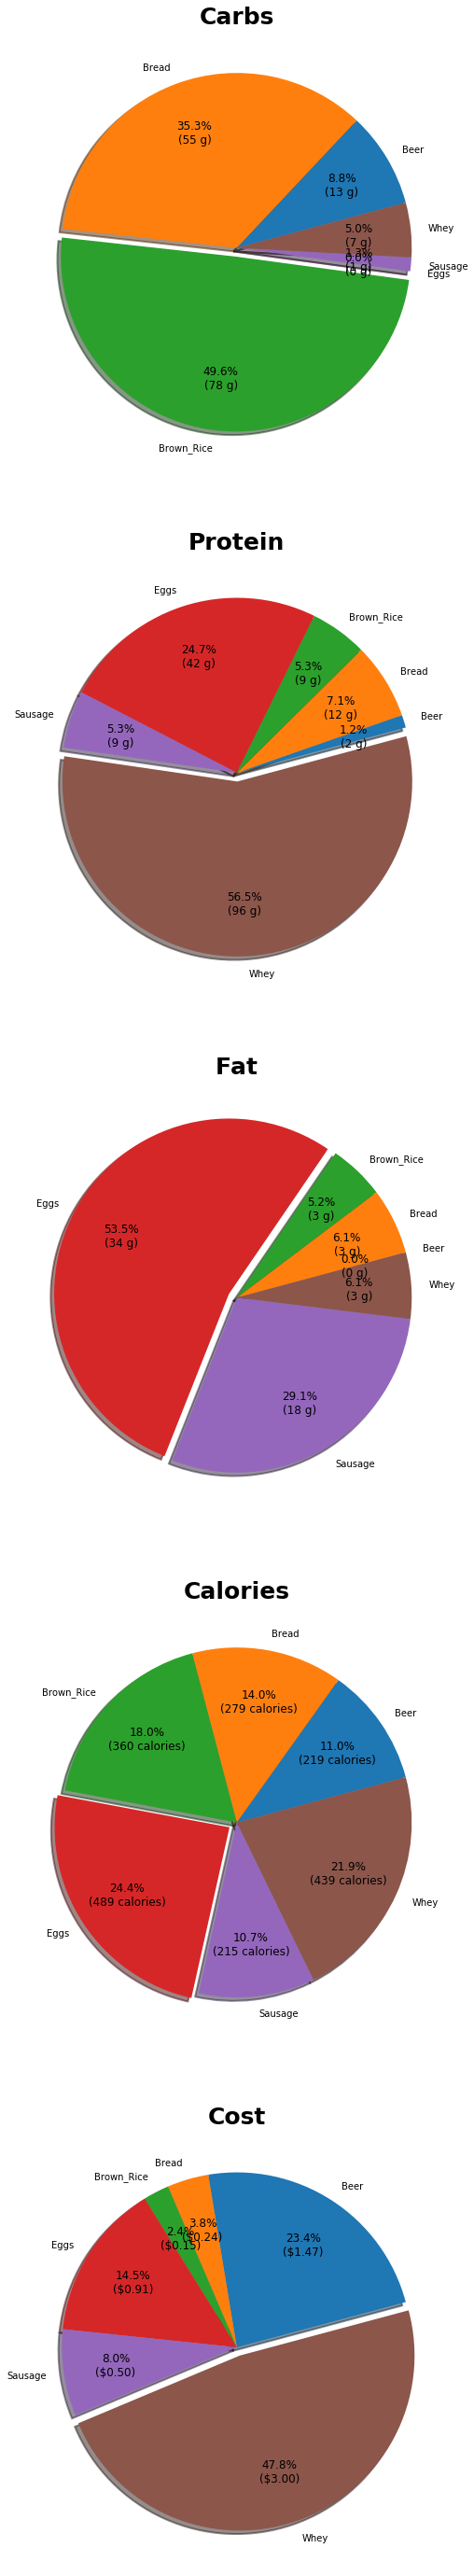

In [517]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

def func1(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    return "{:.1f}%\n(${:.2f})".format(pct, absolute)

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} calories)".format(pct, absolute)

def doColors(autotexts):
    for autotexts in autotexts:
        autotexts.set_color('black')
        #autotexts.size=15
        #autotexts.weight='bold'


explodeVal=0.05
autoWeightVal='normal'
labelVal='black'
autoTxtVal=12
titleVal=25
titleWeightVal='bold'
titleColor='black'
startAngleVal=15
        
print('\n\n')
pp.subplot(5,1,1)
pp.rcParams['text.color'] = labelVal
pp.title("Carbs",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(carbsData).index(np.max(carbsData))] = explodeVal
_,_,autotexts=pp.pie(carbsData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, carbsData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(5,1,2) 
pp.rcParams['text.color'] = labelVal
pp.title("Protein",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(proteinData).index(np.max(proteinData))] = explodeVal
_,_,autotexts=pp.pie(proteinData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, proteinData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)
 
pp.subplot(5,1,3) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fat",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fatData).index(np.max(fatData))] = explodeVal
_,_,autotexts=pp.pie(fatData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fatData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(5,1,4) 
pp.rcParams['text.color'] = labelVal
pp.title("Calories",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(calData).index(np.max(calData))] = explodeVal
_,_,autotexts=pp.pie(calData,explode=explode,labels=namesData, autopct=lambda pct: func2(pct, calData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(5,1,5)
pp.rcParams['text.color'] = labelVal
pp.title("Cost",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(costData).index(np.max(costData))] = explodeVal
_,_,autotexts=pp.pie(costData,explode=explode,labels=namesData, autopct=lambda pct: func1(pct, costData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

fig=pp.gcf()
fig.set_size_inches(50,50)

pp.show()